In [1]:
from __future__ import print_function, division
from builtins import range

# Import NLKT and Numpy libraries
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD


wordnet_lemmatizer = WordNetLemmatizer()

#Load the file content into titles
booktitles = [line.rstrip() for line in open('/users/GP/PycharmProjects/Python/LSA/all_book_titles.txt')]

In [2]:
# Load the stopwords content into stopwords
stopwords = set(w.rstrip() for w in open('/users/GP/PycharmProjects/Python/LSA/stopwords.txt'))


# Additional stopwords can be added in the program to address the problem
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens



In [3]:
# A wordl-to-index has to be created to build the word-frequency vectors.
# Performing tokenization at this stage will save time not to retokenize later.

word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0
for title in booktitles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # Add UTF-8 to avoid any bad characters in the file
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1


print("Display the number of errors from the file:", error_count, "Total SCOL for the number of files:", len(booktitles))

Display the number of errors from the file: 0 Total SCOL for the number of files: 2373


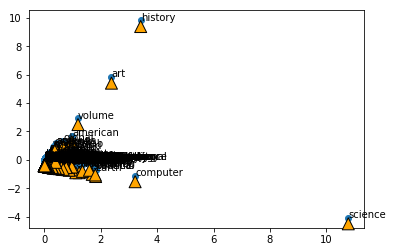

In [4]:
if error_count == len(booktitles):
    print("There is no data to do anything with! Quitting...")
    exit()

# creation of input matrices

def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # terms will go along rows, documents along columns
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

def main():
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]),arrowprops=dict(facecolor='orange', shrink=0.05))
    plt.show()

if __name__ == '__main__':
    main()
